In [1]:
pip install pyvi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 45.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import pandas as pd
import string
from pyvi import ViTokenizer
from gensim.models.fasttext import FastText
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
pathdata = '/kaggle/input/data-vi/datatrain.txt'

def read_data(path):
    traindata = []
    with open(path, 'r', encoding='utf-8') as f:
        sents = f.readlines()
        for sent in sents:
            traindata.append(sent.strip().split())
    return traindata

In [4]:
# Read data from file
train_data = read_data(pathdata)
print(f"Number of sentences: {len(train_data)}")

Number of sentences: 306855


In [5]:
model_fasttext = FastText(vector_size=150, window=10, min_count=2, workers=4, sg=1)
model_fasttext.build_vocab(train_data)
model_fasttext.train(train_data, total_examples=model_fasttext.corpus_count, epochs=model_fasttext.epochs)

(20744572, 25770695)

In [6]:
# Save the trained model
model_fasttext.wv.save("./fasttext_gensim.model")
print("Model saved successfully.")

Model saved successfully.


In [7]:
# Load the trained model (Optional)
from gensim.models import KeyedVectors

model = KeyedVectors.load("/kaggle/working/fasttext_gensim.model")
print("Model loaded successfully.")

# Test the model (Optional)
word = "tôi"
if word in model:
    print(f"Vector for '{word}':\n{model[word]}")
else:
    print(f"'{word}' not in vocabulary.")

Model loaded successfully.
Vector for 'tôi':
[-0.12582777  0.05912003  0.21842739 -0.15166105 -0.20634413 -0.02811069
 -0.62773037  0.10364706  0.828887    0.17717783  0.32208017 -0.3181525
  0.11964685  0.23168515 -0.8737014  -0.72704303  0.10768746 -0.02447076
  0.28961465 -0.26399654 -0.21244514 -0.06806229 -0.23766485 -0.2243264
 -0.25915414  0.23414549 -0.02765725  0.26552975 -0.04096402  0.39839342
  0.19012377  0.2379681  -0.20797573  0.23843323 -0.22608173 -0.448452
  0.29268405  0.00848947 -0.05942916 -0.02676689  0.09273846  0.24489366
  0.05251247  0.03640032  0.6503523  -0.17463098  0.8334618  -0.38135004
  0.05052665  0.07633836 -0.2769228   0.1648784  -0.32320356  0.03904307
 -0.330698   -0.01781406 -0.07167001  0.10823034 -0.23700817 -0.24570382
 -0.2939979   0.03471389  0.11179142 -0.61181885 -0.5660354   0.3613905
 -0.05311815 -0.20064461 -0.07003929 -0.24896328 -0.5418538  -0.10998882
  0.24418746 -0.04827763  0.38121766 -0.13316932 -0.4170091  -0.27429283
 -0.1816027

In [8]:
train_data = read_data(pathdata)
model = Word2Vec(train_data, vector_size=150, window=10, min_count=2, workers=4, sg=0)
model.wv.save("./word2vec_skipgram.model")

In [9]:
model = KeyedVectors.load('/kaggle/working/word2vec_skipgram.model')
result = []
for word in model.most_similar(u"công_nghệ"):
    result.append(' '.join(word[0].split('_')))
    print(word[0])

kỹ_thuật
ứng_dụng
lĩnh_vực
tổ_hợp
công_nghệ_cao
ngành
marketing
kinh_doanh
đồ_họa
tiếp_thị


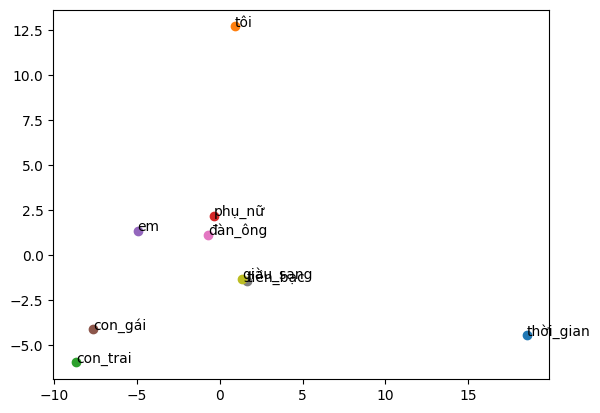

In [10]:
file_path = '/kaggle/input/data-vi/words.txt'
with open(file_path, 'r') as f:
    words = f.readlines()
    words = [word.strip() for word in words]

words_np = []
words_label = []

for word in model.key_to_index.keys():
    if word in words:
        words_np.append(model[word])
        words_label.append(word)

pca = PCA(n_components=2)
pca.fit(words_np)
reduced = pca.transform(words_np)


def visualize():
    fig, ax = plt.subplots()
    for index, vec in enumerate(reduced):
        x, y = vec[0], vec[1]
        ax.scatter(x, y)
        ax.annotate(words_label[index], xy=(x, y))

    plt.show()


visualize()